In [2]:
import pandas as pd

In [3]:
meta_data = pd.read_csv('../../../For_analysis/RNASequencing/IR3/metaDataIR3.csv')
meta_data

,HudAlphaID,QCflagIR3,Specimen Bar Code,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,Specimen Bar Code.1,Quantity (ug),Concentration (ng/ul),...,MEDIAN_3PRIME_BIAS,NUM_UNEXPLAINED_READS,PCT_RIBOSOMAL_BASES,PCT_INTRONIC_BASES,PCT_R2_TRANSCRIPT_STRAND_READS,PCT_MRNA_BASES,MEDIAN_5PRIME_TO_3PRIME_BIAS,PCT_R1_TRANSCRIPT_STRAND_READS,MEDIAN_5PRIME_BIAS,PCT_USABLE_BASES
0,5104-SL-0001,pass,0000373111,3174,Male,PD,V08,0000373111,1.0,115.90,...,0.845235,1093161,0.0,43.4564,98.1025,50.4726,1.191875,1.8975,1.019442,47.9359
1,5104-SL-0002,pass,PP0016-0526,3201,Female,Control,BL,PP0016-0526,1.0,80.07,...,0.913436,569224,0.0,52.9752,98.1428,40.6987,1.058616,1.8572,0.965040,39.6130
2,5104-SL-0003,pass,0003125874,3057,Female,Control,V06,0003125874,1.0,219.70,...,0.902573,485102,0.0,52.2706,95.4321,36.0884,1.095971,4.5679,0.997003,34.8096
3,5104-SL-0004,pass,0003179818,4126,Male,PD,V04,0003179818,1.0,100.06,...,0.856690,1145227,0.0,45.9355,98.3785,48.3407,1.170152,1.6215,1.013765,45.3119
4,5104-SL-0005,pass,0003164601,4117,Female,PD,BL,0003164601,1.0,124.40,...,0.894656,461631,0.0,58.3984,98.0678,35.8255,1.113733,1.9322,0.985280,34.8793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,5104-SL-4890,pass,0003314545,41314,Female,Genetic Cohort,V02,0003314545,1.0,105.10,...,0.707867,1097837,0.0,41.6055,92.5357,40.2167,1.526826,7.4643,1.086717,36.7253
4867,5104-SL-4891,pass,0003376702,42308,Male,Genetic Cohort,V02,0003376702,1.0,56.09,...,0.719713,775420,0.0,47.0490,97.3024,38.8043,1.269003,2.6976,0.946045,35.5802
4868,5104-SL-4892,pass,0003376763,42306,Male,Genetic Cohort,V02,0003376763,1.0,59.68,...,0.736184,794163,0.0,49.0178,97.0378,38.4877,1.300012,2.9622,0.995326,35.4419
4869,5104-SL-4893,pass,0003203630,1010,Unk,HCPOOL,Unk,0003203630,1.0,50.00,...,0.707379,748803,0.0,40.0865,95.8621,44.4177,1.479038,4.1379,1.031890,41.3555


In [4]:
meta_data.columns

Index(['HudAlphaID', 'QCflagIR3', 'Specimen Bar Code', 'PATNO', 'GENDER',
       'DIAGNOSIS', 'CLINICAL_EVENT', 'Specimen Bar Code.1', 'Quantity (ug)',
       'Concentration (ng/ul)', 'Concentration Flag', 'Submitted Volume (ul)',
       'Normalization Volume (30ng/ul)', 'Total Volume (ul)',
       'Input RNASeq (ng)', 'Input miRNA (ng)', '260/280 Ratio',
       '260/230 Ratio', 'RIN Value', 'BOX', 'POSITION', 'Plate', 'Sample',
       'deletion_length', 'insertion_length', 'mismatch_rate',
       'multimapped_percent', 'uniquely_mapped_percent',
       'num_annotated_splices', 'insertion_rate', 'unmapped_other_percent',
       'multimapped', 'num_splices', 'avg_input_read_length',
       'multimapped_toomany', 'total_reads', 'num_GCAG_splices',
       'unmapped_tooshort', 'unmapped_other', 'unmapped_mismatches_percent',
       'num_noncanonical_splices', 'num_ATAC_splices',
       'multimapped_toomany_percent', 'avg_mapped_read_length',
       'unmapped_mismatches', 'deletion_rate', '

In [5]:
meta_data.PATNO.value_counts()

PATNO
1010     53
1009     53
4104      5
3229      5
3214      5
         ..
42349     1
42298     1
42305     1
42431     1
42312     1
Name: count, Length: 1603, dtype: int64

In [6]:
disease_df = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [7]:
disease_df.DIAGNOSIS.value_counts()

DIAGNOSIS
Genetic Registry    435
PD                  425
Genetic Cohort      418
Control             196
Prodromal            64
SWEDD                63
PDPOOL                1
HCPOOL                1
Name: count, dtype: int64

In [8]:
import os

In [9]:
l = 0
for i in os.listdir('../../../For_analysis/RNASequencing/IR3/quant/'):
    l = l + 1
    print(i)
    if l==3:
        break

PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-1516.longRNA-NEBKAP.salmon.genes.sf


In [10]:
gene_excel = pd.ExcelFile('/12tb_dsk3/For_analysis/PD genes.xlsx')


In [11]:
df2 = pd.read_excel(gene_excel, 'Standard PD genes')
##df1 = pd.read_excel(gene_excel, 'Integrated stress response')

In [12]:
df2

,PD genes
0,LRRK2
1,PARK2
2,PARK7
3,PINK
4,SNCA
5,GBA
6,PRKN
7,PINK1
8,VPS35
9,UCHL1


In [13]:
import numpy as np
for i in range(100):
    try:
        gene_list.remove(np.nan) # run 4 times
    except:
        break

In [14]:
gene_list = df2['PD genes'].tolist()

In [15]:
gene_list = [i.strip() for i in gene_list]

In [16]:
gene_list

['LRRK2',
 'PARK2',
 'PARK7',
 'PINK',
 'SNCA',
 'GBA',
 'PRKN',
 'PINK1',
 'VPS35',
 'UCHL1',
 'PARK3',
 'GIGYF2',
 'HTRA2',
 'EIF4G1',
 'TMEM230',
 'CHCHD2',
 'RIC3',
 'VPS35',
 'LRP10',
 'DJ-1',
 'ATP13A2',
 'PLA2G6',
 'FBXO7',
 'DNAJC6',
 'SYNJ1',
 'VPS13C',
 'USP24',
 'PARK12',
 'PARK16']

In [17]:
gene_list = set(gene_list)

In [18]:
len(gene_list )

28

In [19]:
from pybiomart import Server

# Connect to the Ensembl server
server = Server(host='http://www.ensembl.org')
dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']  # Replace with your organism

# Query for gene names and Ensembl IDs
# Replace 'BRCA1' with your gene of interest or a list of genes

genes_of_interest = gene_list
query_results = dataset.query(attributes=['external_gene_name', 'ensembl_gene_id'])

# Filter results for your genes of interest
results = query_results[query_results['Gene name'].isin(genes_of_interest)]
print(results)

      Gene name   Gene stable ID
3045      SYNJ1  ENSG00000159082
6572      LRP10  ENSG00000197324
23468    PLA2G6  ENSG00000184381
24967    DNAJC6  ENSG00000116675
27540     FBXO7  ENSG00000100225
27674   TMEM230  ENSG00000089063
28381    EIF4G1  ENSG00000114867
35592     PINK1  ENSG00000158828
39101      SNCA  ENSG00000145335
39185    GIGYF2  ENSG00000204120
39234     LRRK2  ENSG00000188906
41798     UCHL1  ENSG00000154277
43169   ATP13A2  ENSG00000159363
52293    CHCHD2  ENSG00000106153
53841     VPS35  ENSG00000069329
55425      PRKN  ENSG00000185345
62378     HTRA2  ENSG00000115317
62412    VPS13C  ENSG00000129003
62747      RIC3  ENSG00000166405
81439     PARK7  ENSG00000116288
82823     USP24  ENSG00000162402


In [20]:
len(results)


21

In [21]:
set(gene_list) - set(results['Gene name'].tolist())

{'DJ-1', 'GBA', 'PARK12', 'PARK16', 'PARK2', 'PARK3', 'PINK'}

In [22]:
keep_genes = results['Gene stable ID'].tolist()

In [23]:
keep_genes.extend(['ENSG00000177628','ENSG00000158828','ENSG00000116288','ENSG00000185345'])

In [24]:
keep_genes

['ENSG00000159082',
 'ENSG00000197324',
 'ENSG00000184381',
 'ENSG00000116675',
 'ENSG00000100225',
 'ENSG00000089063',
 'ENSG00000114867',
 'ENSG00000158828',
 'ENSG00000145335',
 'ENSG00000204120',
 'ENSG00000188906',
 'ENSG00000154277',
 'ENSG00000159363',
 'ENSG00000106153',
 'ENSG00000069329',
 'ENSG00000185345',
 'ENSG00000115317',
 'ENSG00000129003',
 'ENSG00000166405',
 'ENSG00000116288',
 'ENSG00000162402',
 'ENSG00000177628',
 'ENSG00000158828',
 'ENSG00000116288',
 'ENSG00000185345']

In [25]:
#GBA1 ENSG00000177628
 
#PINK1 ENSG00000158828
 
#PARK7 ENSG00000116288
 
#PRKN ENSG00000185345'''
 

In [26]:
sample_3813 = pd.read_csv('../../../For_analysis/RNASequencing/IR3/quant/PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf' ,sep = '\t')
m = [i.split('.')[0] for i in sample_3813.Name.tolist()]

In [27]:
keep_genes = list(set(m).intersection(keep_genes))

In [28]:
len(keep_genes)

22

In [29]:
l = 0
from tqdm import tqdm
data = pd.DataFrame(columns=keep_genes)
for i in tqdm(os.listdir('../../../For_analysis/RNASequencing/IR3/quant/')):
    if 'genes' not in i:
        continue
    
    read_file_path = '../../../For_analysis/RNASequencing/IR3/quant/'+ str(i)
    df = pd.read_csv(read_file_path ,sep = '\t')
    #print(df.head())
    m = [i.split('.')[0] for i in df.Name.tolist()]
    df['Name'] = m 
    df = df.rename(columns={'TPM': i})
    #print(df.head())
    df = df.set_index('Name')[[i]].T
    
    df = df[keep_genes]
    #print(df.head())
    data = pd.concat([data,df])

  0%|                                                                                                                                         | 0/9513 [00:00<?, ?it/s]/tmp/ipykernel_153724/804910374.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,df])
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9513/9513 [02:16<00:00, 69.64it/s]


In [30]:
data.sort_index()

,ENSG00000185345,ENSG00000106153,ENSG00000159363,ENSG00000154277,ENSG00000166405,ENSG00000115317,ENSG00000159082,ENSG00000204120,ENSG00000100225,ENSG00000197324,...,ENSG00000116288,ENSG00000158828,ENSG00000116675,ENSG00000184381,ENSG00000162402,ENSG00000089063,ENSG00000145335,ENSG00000129003,ENSG00000177628,ENSG00000114867
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-0095.longRNA-NEBKAP.salmon.genes.sf,7.142020,88.8731,4.489540,0.098922,9.70544,9.59610,26.4150,88.2908,219.187,33.38450,...,59.6453,30.9349,3.47833,25.79370,43.9370,22.5731,710.733,68.0320,7.35766,16.09400
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-0287.longRNA-NEBKAP.salmon.genes.sf,4.529920,55.8903,1.243330,0.183192,6.71843,6.12941,16.3858,43.7305,154.205,5.31612,...,40.2482,19.2210,4.54705,8.95530,22.7027,17.1457,504.613,43.7002,2.38582,8.83102
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-0479.longRNA-NEBKAP.salmon.genes.sf,6.336230,80.2522,1.715190,0.095766,7.21011,7.91305,20.9780,64.1214,229.806,7.02635,...,50.5780,20.7776,5.53020,12.09460,31.7329,22.3637,846.073,50.6662,3.77355,11.01480
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-0671.longRNA-NEBKAP.salmon.genes.sf,4.112340,66.7283,1.947130,0.102943,8.57461,7.20115,17.4263,55.7483,209.944,6.91305,...,47.7693,19.8813,5.10497,10.23880,29.0969,22.5966,765.143,48.6334,2.95493,10.98530
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-0767.longRNA-NEBKAP.salmon.genes.sf,7.216740,79.2422,1.904380,0.035232,8.28976,7.47219,22.7835,72.5651,223.106,7.00882,...,49.8325,21.6459,5.21236,10.41100,33.9207,25.0990,749.998,58.6103,2.90753,9.59901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-2827.longRNA-NEBKAP.salmon.genes.sf,1.125150,59.9898,1.062000,0.053209,6.07195,8.04014,13.3604,37.3828,124.909,4.88671,...,41.8486,14.8543,2.51273,7.39755,13.4071,19.9616,314.188,30.8916,3.45005,7.20384
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-2875.longRNA-NEBKAP.salmon.genes.sf,2.110430,52.5922,1.836090,0.092293,8.38107,7.47919,15.8531,54.3430,454.374,11.26760,...,38.3234,29.2758,6.82636,14.16220,25.5521,23.7501,1046.620,43.9281,7.01067,17.22520
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-2868.longRNA-NEBKAP.salmon.genes.sf,4.134420,58.6068,2.102890,0.024467,7.77162,9.64716,16.5319,56.9649,284.129,9.55612,...,47.3043,27.5793,7.44685,10.95960,24.5599,24.3451,767.495,44.5156,7.45101,16.30930
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-4064.longRNA-NEBKAP.salmon.genes.sf,1.567830,77.2424,0.482567,0.031876,3.88781,9.07040,19.4674,42.9804,324.014,5.56561,...,60.8346,40.6491,7.26520,6.48493,18.3418,31.2005,1346.350,37.0995,3.35891,5.71300


In [31]:
meta_data

,HudAlphaID,QCflagIR3,Specimen Bar Code,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,Specimen Bar Code.1,Quantity (ug),Concentration (ng/ul),...,MEDIAN_3PRIME_BIAS,NUM_UNEXPLAINED_READS,PCT_RIBOSOMAL_BASES,PCT_INTRONIC_BASES,PCT_R2_TRANSCRIPT_STRAND_READS,PCT_MRNA_BASES,MEDIAN_5PRIME_TO_3PRIME_BIAS,PCT_R1_TRANSCRIPT_STRAND_READS,MEDIAN_5PRIME_BIAS,PCT_USABLE_BASES
0,5104-SL-0001,pass,0000373111,3174,Male,PD,V08,0000373111,1.0,115.90,...,0.845235,1093161,0.0,43.4564,98.1025,50.4726,1.191875,1.8975,1.019442,47.9359
1,5104-SL-0002,pass,PP0016-0526,3201,Female,Control,BL,PP0016-0526,1.0,80.07,...,0.913436,569224,0.0,52.9752,98.1428,40.6987,1.058616,1.8572,0.965040,39.6130
2,5104-SL-0003,pass,0003125874,3057,Female,Control,V06,0003125874,1.0,219.70,...,0.902573,485102,0.0,52.2706,95.4321,36.0884,1.095971,4.5679,0.997003,34.8096
3,5104-SL-0004,pass,0003179818,4126,Male,PD,V04,0003179818,1.0,100.06,...,0.856690,1145227,0.0,45.9355,98.3785,48.3407,1.170152,1.6215,1.013765,45.3119
4,5104-SL-0005,pass,0003164601,4117,Female,PD,BL,0003164601,1.0,124.40,...,0.894656,461631,0.0,58.3984,98.0678,35.8255,1.113733,1.9322,0.985280,34.8793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,5104-SL-4890,pass,0003314545,41314,Female,Genetic Cohort,V02,0003314545,1.0,105.10,...,0.707867,1097837,0.0,41.6055,92.5357,40.2167,1.526826,7.4643,1.086717,36.7253
4867,5104-SL-4891,pass,0003376702,42308,Male,Genetic Cohort,V02,0003376702,1.0,56.09,...,0.719713,775420,0.0,47.0490,97.3024,38.8043,1.269003,2.6976,0.946045,35.5802
4868,5104-SL-4892,pass,0003376763,42306,Male,Genetic Cohort,V02,0003376763,1.0,59.68,...,0.736184,794163,0.0,49.0178,97.0378,38.4877,1.300012,2.9622,0.995326,35.4419
4869,5104-SL-4893,pass,0003203630,1010,Unk,HCPOOL,Unk,0003203630,1.0,50.00,...,0.707379,748803,0.0,40.0865,95.8621,44.4177,1.479038,4.1379,1.031890,41.3555


In [32]:
l = data.index.tolist()
patient_no = [i.split('.')[1] for i in l]
time_point = [i.split('.')[2] for i in l]

In [33]:
data['Patient_Name'] = patient_no 
data['Time_Point'] = time_point

In [34]:
col_index= ['Patient_Name',
 'Time_Point']+ data.columns.tolist()[0:-2]

In [35]:
data = data[col_index]

In [36]:
data = data.sort_values(by = 'Patient_Name', axis = 0)

In [37]:
data

,Patient_Name,Time_Point,ENSG00000185345,ENSG00000106153,ENSG00000159363,ENSG00000154277,ENSG00000166405,ENSG00000115317,ENSG00000159082,ENSG00000204120,...,ENSG00000116288,ENSG00000158828,ENSG00000116675,ENSG00000184381,ENSG00000162402,ENSG00000089063,ENSG00000145335,ENSG00000129003,ENSG00000177628,ENSG00000114867
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-1343.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,4.591900,63.9422,1.975070,0.203001,7.21508,6.40834,19.54570,61.5084,...,45.5294,18.37870,5.32840,10.14860,29.60840,20.23210,780.984,48.43210,4.71873,11.49040
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-0671.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,4.112340,66.7283,1.947130,0.102943,8.57461,7.20115,17.42630,55.7483,...,47.7693,19.88130,5.10497,10.23880,29.09690,22.59660,765.143,48.63340,2.95493,10.98530
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-4014.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,3.972930,60.1890,1.728080,0.078840,9.24280,7.72808,18.05010,62.9168,...,49.2475,22.10850,5.47921,13.77320,31.12680,24.18070,907.630,57.92050,4.04566,11.90710
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-0959.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,1.443310,25.3442,0.793979,0.063134,3.94036,3.31746,8.21350,30.5277,...,23.3797,8.16036,2.27054,4.57396,12.65670,8.27238,359.657,23.45790,1.73871,4.96481
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-1719.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,5.418040,73.3327,1.900820,0.000000,8.12459,7.56547,18.53090,65.8042,...,51.1253,22.60300,4.97266,9.68097,31.99100,21.70480,734.156,50.54030,3.48746,11.08950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-2868.longRNA-NEBKAP.salmon.genes.sf,92490,V06,4.134420,58.6068,2.102890,0.024467,7.77162,9.64716,16.53190,56.9649,...,47.3043,27.57930,7.44685,10.95960,24.55990,24.34510,767.495,44.51560,7.45101,16.30930
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-2827.longRNA-NEBKAP.salmon.genes.sf,92490,V02,1.125150,59.9898,1.062000,0.053209,6.07195,8.04014,13.36040,37.3828,...,41.8486,14.85430,2.51273,7.39755,13.40710,19.96160,314.188,30.89160,3.45005,7.20384
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-0950.longRNA-NEBKAP.salmon.genes.sf,92834,BL,0.940375,37.7267,0.307232,0.015775,1.23986,4.54960,5.65971,10.5399,...,33.9134,19.48300,2.69024,3.65123,5.04216,10.83360,652.481,8.00855,2.18596,3.47820
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-4064.longRNA-NEBKAP.salmon.genes.sf,92834,V02,1.567830,77.2424,0.482567,0.031876,3.88781,9.07040,19.46740,42.9804,...,60.8346,40.64910,7.26520,6.48493,18.34180,31.20050,1346.350,37.09950,3.35891,5.71300


In [38]:
temp_meta = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [39]:
temp_meta.PATNO = temp_meta.PATNO.astype(str)

In [40]:
data = pd.merge(data,temp_meta, left_on = 'Patient_Name', right_on = 'PATNO')

In [41]:
keep_columns = ['DIAGNOSIS'] + data.columns.tolist()[0:-2]

In [42]:
data = data[keep_columns]

In [43]:
data

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000185345,ENSG00000106153,ENSG00000159363,ENSG00000154277,ENSG00000166405,ENSG00000115317,ENSG00000159082,...,ENSG00000116288,ENSG00000158828,ENSG00000116675,ENSG00000184381,ENSG00000162402,ENSG00000089063,ENSG00000145335,ENSG00000129003,ENSG00000177628,ENSG00000114867
0,PDPOOL,1009,POOL,4.591900,63.9422,1.975070,0.203001,7.21508,6.40834,19.54570,...,45.5294,18.37870,5.32840,10.14860,29.60840,20.23210,780.984,48.43210,4.71873,11.49040
1,PDPOOL,1009,POOL,4.112340,66.7283,1.947130,0.102943,8.57461,7.20115,17.42630,...,47.7693,19.88130,5.10497,10.23880,29.09690,22.59660,765.143,48.63340,2.95493,10.98530
2,PDPOOL,1009,POOL,3.972930,60.1890,1.728080,0.078840,9.24280,7.72808,18.05010,...,49.2475,22.10850,5.47921,13.77320,31.12680,24.18070,907.630,57.92050,4.04566,11.90710
3,PDPOOL,1009,POOL,1.443310,25.3442,0.793979,0.063134,3.94036,3.31746,8.21350,...,23.3797,8.16036,2.27054,4.57396,12.65670,8.27238,359.657,23.45790,1.73871,4.96481
4,PDPOOL,1009,POOL,5.418040,73.3327,1.900820,0.000000,8.12459,7.56547,18.53090,...,51.1253,22.60300,4.97266,9.68097,31.99100,21.70480,734.156,50.54030,3.48746,11.08950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,Prodromal,92490,V06,4.134420,58.6068,2.102890,0.024467,7.77162,9.64716,16.53190,...,47.3043,27.57930,7.44685,10.95960,24.55990,24.34510,767.495,44.51560,7.45101,16.30930
4740,Prodromal,92490,V02,1.125150,59.9898,1.062000,0.053209,6.07195,8.04014,13.36040,...,41.8486,14.85430,2.51273,7.39755,13.40710,19.96160,314.188,30.89160,3.45005,7.20384
4741,Prodromal,92834,BL,0.940375,37.7267,0.307232,0.015775,1.23986,4.54960,5.65971,...,33.9134,19.48300,2.69024,3.65123,5.04216,10.83360,652.481,8.00855,2.18596,3.47820
4742,Prodromal,92834,V02,1.567830,77.2424,0.482567,0.031876,3.88781,9.07040,19.46740,...,60.8346,40.64910,7.26520,6.48493,18.34180,31.20050,1346.350,37.09950,3.35891,5.71300


In [44]:
data = data[data.DIAGNOSIS.isin(['PD','Control','Prodromal'])]

In [45]:
data

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000185345,ENSG00000106153,ENSG00000159363,ENSG00000154277,ENSG00000166405,ENSG00000115317,ENSG00000159082,...,ENSG00000116288,ENSG00000158828,ENSG00000116675,ENSG00000184381,ENSG00000162402,ENSG00000089063,ENSG00000145335,ENSG00000129003,ENSG00000177628,ENSG00000114867
106,Prodromal,10874,V06,5.449030,55.1475,1.766840,0.059054,7.16238,6.79427,18.35200,...,43.8943,19.3833,2.91785,11.81420,34.03580,24.9986,937.116,57.47330,4.26319,12.87470
107,Prodromal,10874,BL,3.544770,89.9600,1.971750,0.209948,6.32326,8.78233,18.43220,...,70.3614,31.5031,4.24245,8.29880,28.44880,30.4444,1262.060,57.87220,3.24708,10.72780
108,Prodromal,10874,V04,7.300970,56.0238,2.318080,0.000000,8.54016,7.59495,19.13960,...,48.9326,21.6697,3.34211,16.43900,37.80080,28.2738,1078.830,58.90900,5.71688,17.57940
109,Prodromal,10874,V02,8.292420,51.4918,2.585340,0.647189,13.00300,7.19955,20.11600,...,46.1757,16.7646,2.42422,14.53540,38.98110,24.4780,611.327,57.45470,6.32171,14.26130
110,Prodromal,12224,V08,6.211890,76.3473,2.511320,0.573776,13.74970,7.34867,21.74030,...,63.2516,24.7971,4.61498,13.78580,39.90350,33.6460,1527.620,71.71000,3.11710,11.13510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,Prodromal,92490,V06,4.134420,58.6068,2.102890,0.024467,7.77162,9.64716,16.53190,...,47.3043,27.5793,7.44685,10.95960,24.55990,24.3451,767.495,44.51560,7.45101,16.30930
4740,Prodromal,92490,V02,1.125150,59.9898,1.062000,0.053209,6.07195,8.04014,13.36040,...,41.8486,14.8543,2.51273,7.39755,13.40710,19.9616,314.188,30.89160,3.45005,7.20384
4741,Prodromal,92834,BL,0.940375,37.7267,0.307232,0.015775,1.23986,4.54960,5.65971,...,33.9134,19.4830,2.69024,3.65123,5.04216,10.8336,652.481,8.00855,2.18596,3.47820
4742,Prodromal,92834,V02,1.567830,77.2424,0.482567,0.031876,3.88781,9.07040,19.46740,...,60.8346,40.6491,7.26520,6.48493,18.34180,31.2005,1346.350,37.09950,3.35891,5.71300


In [46]:
data.to_csv('/12tb_dsk3/For_analysis/count_matrix_per_gene_list/PD_genes_expression.csv', index=False)

In [47]:
data.columns

Index(['DIAGNOSIS', 'Patient_Name', 'Time_Point', 'ENSG00000185345',
       'ENSG00000106153', 'ENSG00000159363', 'ENSG00000154277',
       'ENSG00000166405', 'ENSG00000115317', 'ENSG00000159082',
       'ENSG00000204120', 'ENSG00000100225', 'ENSG00000197324',
       'ENSG00000188906', 'ENSG00000069329', 'ENSG00000116288',
       'ENSG00000158828', 'ENSG00000116675', 'ENSG00000184381',
       'ENSG00000162402', 'ENSG00000089063', 'ENSG00000145335',
       'ENSG00000129003', 'ENSG00000177628', 'ENSG00000114867'],
      dtype='object')

In [48]:
# comparing control vs all time

In [49]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

In [50]:
Control_sample = data[data.DIAGNOSIS == 'Control']

In [51]:
Control_sample.Time_Point.value_counts()

Time_Point
BL     189
V04    179
V02    177
V06    165
V08    159
Name: count, dtype: int64

In [52]:
PD_sample = data[data.DIAGNOSIS == 'PD']
PD_sample.Time_Point.value_counts()

Time_Point
BL     393
V04    354
V06    352
V08    340
V02    277
Name: count, dtype: int64

In [53]:
Prodromal_sample = data[data.DIAGNOSIS == 'Prodromal']
Prodromal_sample.Time_Point.value_counts()

Time_Point
V04    59
V02    59
V06    58
BL     58
V08    20
Name: count, dtype: int64

In [54]:
Prodromal_sample = Prodromal_sample.reset_index(drop=True)
Prodromal_sample

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000185345,ENSG00000106153,ENSG00000159363,ENSG00000154277,ENSG00000166405,ENSG00000115317,ENSG00000159082,...,ENSG00000116288,ENSG00000158828,ENSG00000116675,ENSG00000184381,ENSG00000162402,ENSG00000089063,ENSG00000145335,ENSG00000129003,ENSG00000177628,ENSG00000114867
0,Prodromal,10874,V06,5.449030,55.1475,1.766840,0.059054,7.16238,6.79427,18.35200,...,43.8943,19.3833,2.91785,11.81420,34.03580,24.9986,937.116,57.47330,4.26319,12.87470
1,Prodromal,10874,BL,3.544770,89.9600,1.971750,0.209948,6.32326,8.78233,18.43220,...,70.3614,31.5031,4.24245,8.29880,28.44880,30.4444,1262.060,57.87220,3.24708,10.72780
2,Prodromal,10874,V04,7.300970,56.0238,2.318080,0.000000,8.54016,7.59495,19.13960,...,48.9326,21.6697,3.34211,16.43900,37.80080,28.2738,1078.830,58.90900,5.71688,17.57940
3,Prodromal,10874,V02,8.292420,51.4918,2.585340,0.647189,13.00300,7.19955,20.11600,...,46.1757,16.7646,2.42422,14.53540,38.98110,24.4780,611.327,57.45470,6.32171,14.26130
4,Prodromal,12224,V08,6.211890,76.3473,2.511320,0.573776,13.74970,7.34867,21.74030,...,63.2516,24.7971,4.61498,13.78580,39.90350,33.6460,1527.620,71.71000,3.11710,11.13510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Prodromal,92490,V06,4.134420,58.6068,2.102890,0.024467,7.77162,9.64716,16.53190,...,47.3043,27.5793,7.44685,10.95960,24.55990,24.3451,767.495,44.51560,7.45101,16.30930
250,Prodromal,92490,V02,1.125150,59.9898,1.062000,0.053209,6.07195,8.04014,13.36040,...,41.8486,14.8543,2.51273,7.39755,13.40710,19.9616,314.188,30.89160,3.45005,7.20384
251,Prodromal,92834,BL,0.940375,37.7267,0.307232,0.015775,1.23986,4.54960,5.65971,...,33.9134,19.4830,2.69024,3.65123,5.04216,10.8336,652.481,8.00855,2.18596,3.47820
252,Prodromal,92834,V02,1.567830,77.2424,0.482567,0.031876,3.88781,9.07040,19.46740,...,60.8346,40.6491,7.26520,6.48493,18.34180,31.2005,1346.350,37.09950,3.35891,5.71300


In [55]:
PD_sample = PD_sample.reset_index(drop=True)
PD_sample 

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000185345,ENSG00000106153,ENSG00000159363,ENSG00000154277,ENSG00000166405,ENSG00000115317,ENSG00000159082,...,ENSG00000116288,ENSG00000158828,ENSG00000116675,ENSG00000184381,ENSG00000162402,ENSG00000089063,ENSG00000145335,ENSG00000129003,ENSG00000177628,ENSG00000114867
0,PD,3001,BL,1.756920,34.3726,1.01174,0.016154,7.05349,3.67109,11.1437,...,31.0981,9.21338,1.950980,6.26748,13.7645,11.37440,307.437,29.3822,1.72208,6.08308
1,PD,3001,V02,4.190620,73.6386,1.61034,0.128732,12.40700,8.43290,21.8249,...,59.3378,18.83140,1.761370,9.80657,31.3530,26.93670,544.289,70.3563,3.08184,12.23570
2,PD,3001,V06,3.580440,30.8604,1.70667,0.395362,9.75552,4.40131,13.6891,...,35.0741,13.32690,1.598990,8.65442,16.6411,12.08110,363.941,34.2521,2.28641,8.74464
3,PD,3001,V08,1.497930,22.5691,0.78205,0.072173,4.56358,3.82971,10.6353,...,26.5692,11.09930,0.983176,4.96116,15.1709,10.28400,419.341,24.7251,2.24024,6.37795
4,PD,3001,V04,4.725080,64.3527,1.34640,0.101421,11.47840,7.32403,17.4853,...,49.5041,22.53470,3.343000,7.70604,26.5977,22.64040,542.364,62.6773,2.42378,10.76290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,PD,4135,V04,0.644532,35.5022,0.83818,0.020587,2.84894,3.22009,12.7665,...,29.4949,13.36980,25.824400,4.52627,13.8315,9.31574,619.088,25.8173,1.33931,2.87864
1712,PD,4135,V02,7.121230,78.9923,2.60976,0.381744,9.55958,10.24470,28.6544,...,60.4149,56.17720,10.886200,24.79000,40.5845,32.56090,1436.270,69.1479,4.80075,17.83790
1713,PD,4136,V06,4.146740,75.5410,1.81593,0.014219,6.20442,8.67216,20.5574,...,54.4703,33.28070,5.135940,14.94670,29.0133,27.95020,1131.080,45.0327,3.17093,12.43780
1714,PD,4136,BL,2.228880,46.0946,3.95658,0.587799,7.07401,8.97360,13.6405,...,37.7126,36.62250,6.919620,27.06830,29.4882,24.34370,1477.950,39.5784,5.65651,23.03690


In [56]:
elements = list(set(data.Time_Point))

In [57]:
import itertools

# Define the list


# Generate all combinations of 2 including reverse pairs
combinations_with_reverse = list(itertools.product(elements, repeat=2))

# Print the result
for combo in combinations_with_reverse:
    print(combo)

('V06', 'V06')
('V06', 'BL')
('V06', 'V02')
('V06', 'V04')
('V06', 'V08')
('BL', 'V06')
('BL', 'BL')
('BL', 'V02')
('BL', 'V04')
('BL', 'V08')
('V02', 'V06')
('V02', 'BL')
('V02', 'V02')
('V02', 'V04')
('V02', 'V08')
('V04', 'V06')
('V04', 'BL')
('V04', 'V02')
('V04', 'V04')
('V04', 'V08')
('V08', 'V06')
('V08', 'BL')
('V08', 'V02')
('V08', 'V04')
('V08', 'V08')


# A. all combination PRODROMAL vs PD

In [58]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
import random
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import random
from itertools import product  # assuming combinations_with_reverse is some kind of product

ACCURACY_DICT = dict()
MAX_SAMPLES = dict()
FEATURE_IMPORTANCES = dict()

F1_SCORES = dict()
PRECISION_SCORES = dict()
RECALL_SCORES = dict()
AUC_SCORES = dict()


for combo in tqdm(combinations_with_reverse):
    
    Prodromal_sample_ = Prodromal_sample[Prodromal_sample.Time_Point== combo[0]].iloc[:,3:]
    Prodromal_sample_ = Prodromal_sample_.reset_index(drop = True)
    
    PD_sample_ = PD_sample[PD_sample.Time_Point== combo[1]].iloc[:,3:]
    PD_sample_ = PD_sample_.reset_index(drop = True)

    
    accuracies_temp = []
    auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    
    for i in range(1000):
        
        max_num = min(len(Prodromal_sample_),len(PD_sample_))
        
        random_numbers = random.sample(range(0, max_num), max_num)
        
        Prodromal_sample_temp = Prodromal_sample_.iloc[random_numbers,:]
        
        PD_sample_temp = PD_sample_.iloc[random_numbers,:]
        
        X = pd.concat([Prodromal_sample_temp,PD_sample_temp])
        
        y = [0 for i in range(len(Prodromal_sample_temp))] + [1 for i in range(len(PD_sample_temp))]
    
    
    # Stratified train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # Initialize and fit the Logistic Regression model
        model = LogisticRegression(max_iter=50000)
        rfe = RFE(estimator=model,n_features_to_select=22)  # Select top 10 features, adjust as needed
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)


        selected_features = X.columns[rfe.support_]
        feature_ranks = rfe.ranking_
        model.fit(X_train_rfe, y_train)
        
        # Predict and evaluate the model
        y_pred = model.predict(X_test_rfe)
        y_prob = model.predict_proba(X_test_rfe)[:, 1]  # probability for the positive class
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracies_temp.append(accuracy)
        auc_scores.append(auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        
           
        coefficients = model.coef_.flatten()
        feature_coefficients = dict(zip(selected_features, coefficients))
        FEATURE_IMPORTANCES[f'Prodromal_{combo[0]}_PD_{combo[1]}_{i}'] =feature_coefficients
        
        

    ACCURACY_DICT[f'Prodromal_{combo[0]}_PD_{combo[1]}'] = np.mean(accuracies_temp)
    MAX_SAMPLES[f'Prodromal_{combo[0]}_PD_{combo[1]}'] = max_num

    PRECISION_SCORES[f'Prodromal_{combo[0]}_PD_{combo[1]}'] =  np.mean(precision_scores)
    RECALL_SCORES[f'Prodromal_{combo[0]}_PD_{combo[1]}'] =  np.mean(recall_scores)
    AUC_SCORES[f'Prodromal_{combo[0]}_PD_{combo[1]}'] =  np.mean(auc_scores)
    
    # Storing additional metrics
    print(f"Metrics for Prodromal_{combo[0]}_PD_{combo[1]}:")
    print(f"Accuracy: {np.mean(accuracies_temp)}")
    print(f"AUC: {np.mean(auc_scores)}")
    print(f"Precision: {np.mean(precision_scores)}")
    print(f"Recall: {np.mean(recall_scores)}")
    print(f"F1 Score: {np.mean(f1_scores)}")



  4%|█████                                                                                                                           | 1/25 [04:12<1:40:50, 252.10s/it]

Metrics for Prodromal_V06_PD_V06:
Accuracy: 0.7930833333333333
AUC: 0.8543125
Precision: 0.8071457961972669
Recall: 0.78475
F1 Score: 0.7898612032744454


  8%|██████████▏                                                                                                                     | 2/25 [08:26<1:37:10, 253.50s/it]

Metrics for Prodromal_V06_PD_BL:
Accuracy: 0.7722916666666666
AUC: 0.8605763888888889
Precision: 0.7823680499239323
Recall: 0.7715833333333334
F1 Score: 0.7698431006977351


 12%|███████████████▎                                                                                                                | 3/25 [13:34<1:41:59, 278.15s/it]

Metrics for Prodromal_V06_PD_V02:
Accuracy: 0.7527083333333333
AUC: 0.8163680555555557
Precision: 0.7576563685798207
Recall: 0.7586666666666667
F1 Score: 0.7515405007226307


 16%|████████████████████▍                                                                                                           | 4/25 [17:28<1:31:20, 260.97s/it]

Metrics for Prodromal_V06_PD_V04:
Accuracy: 0.80875
AUC: 0.8667986111111111
Precision: 0.8100580230098419
Recall: 0.82075
F1 Score: 0.8094552364502673


 20%|█████████████████████████▌                                                                                                      | 5/25 [21:38<1:25:37, 256.87s/it]

Metrics for Prodromal_V06_PD_V08:
Accuracy: 0.8111666666666666
AUC: 0.8860972222222222
Precision: 0.8328537145044497
Recall: 0.7930833333333333
F1 Score: 0.806248432957699


 24%|██████████████████████████████▋                                                                                                 | 6/25 [25:46<1:20:25, 254.00s/it]

Metrics for Prodromal_BL_PD_V06:
Accuracy: 0.5734583333333333
AUC: 0.5831875
Precision: 0.5762542849694166
Recall: 0.5710833333333334
F1 Score: 0.5670740178771098


 28%|███████████████████████████████████▊                                                                                            | 7/25 [29:27<1:12:58, 243.27s/it]

Metrics for Prodromal_BL_PD_BL:
Accuracy: 0.6255833333333334
AUC: 0.6414236111111111
Precision: 0.627638077411065
Recall: 0.63625
F1 Score: 0.6244555472078299


 32%|████████████████████████████████████████▉                                                                                       | 8/25 [34:12<1:12:40, 256.49s/it]

Metrics for Prodromal_BL_PD_V02:
Accuracy: 0.711
AUC: 0.7697916666666667
Precision: 0.7130448984967561
Recall: 0.7245
F1 Score: 0.7115721562740903


 36%|██████████████████████████████████████████████                                                                                  | 9/25 [38:18<1:07:31, 253.20s/it]

Metrics for Prodromal_BL_PD_V04:
Accuracy: 0.6461666666666668
AUC: 0.6677152777777778
Precision: 0.651882459886175
Recall: 0.65225
F1 Score: 0.6442723020990558


 40%|██████████████████████████████████████████████████▊                                                                            | 10/25 [42:32<1:03:21, 253.46s/it]

Metrics for Prodromal_BL_PD_V08:
Accuracy: 0.5694583333333333
AUC: 0.5997430555555555
Precision: 0.5666848130498672
Recall: 0.6015833333333334
F1 Score: 0.5776319001266893


 44%|████████████████████████████████████████████████████████▊                                                                        | 11/25 [46:52<59:35, 255.37s/it]

Metrics for Prodromal_V02_PD_V06:
Accuracy: 0.781875
AUC: 0.8584652777777778
Precision: 0.799902220328691
Recall: 0.7684166666666667
F1 Score: 0.7765260547140176


 48%|█████████████████████████████████████████████████████████████▉                                                                   | 12/25 [50:13<51:43, 238.72s/it]

Metrics for Prodromal_V02_PD_BL:
Accuracy: 0.83
AUC: 0.9216875
Precision: 0.833043800562183
Recall: 0.8381666666666667
F1 Score: 0.8302583891683396


 52%|███████████████████████████████████████████████████████████████████                                                              | 13/25 [55:47<53:31, 267.61s/it]

Metrics for Prodromal_V02_PD_V02:
Accuracy: 0.7052916666666667
AUC: 0.7505138888888889
Precision: 0.7110493767670237
Recall: 0.7100833333333334
F1 Score: 0.703179248154147


 56%|████████████████████████████████████████████████████████████████████████▏                                                        | 14/25 [59:36<46:57, 256.16s/it]

Metrics for Prodromal_V02_PD_V04:
Accuracy: 0.7946666666666666
AUC: 0.8810069444444445
Precision: 0.797654777236008
Recall: 0.8060833333333333
F1 Score: 0.7956061453186739


 60%|████████████████████████████████████████████████████████████████████████████▏                                                  | 15/25 [1:03:39<41:59, 251.94s/it]

Metrics for Prodromal_V02_PD_V08:
Accuracy: 0.8032083333333334
AUC: 0.892263888888889
Precision: 0.8110944788871259
Recall: 0.807
F1 Score: 0.8020923568621267


 64%|█████████████████████████████████████████████████████████████████████████████████▎                                             | 16/25 [1:08:19<39:04, 260.53s/it]

Metrics for Prodromal_V04_PD_V06:
Accuracy: 0.7734166666666668
AUC: 0.8292291666666667
Precision: 0.7817156548516844
Recall: 0.7748333333333333
F1 Score: 0.7718414691343205


 68%|██████████████████████████████████████████████████████████████████████████████████████▎                                        | 17/25 [1:12:31<34:24, 258.05s/it]

Metrics for Prodromal_V04_PD_BL:
Accuracy: 0.7552083333333334
AUC: 0.8361111111111111
Precision: 0.7610122113997114
Recall: 0.763
F1 Score: 0.7547956042155547


 72%|███████████████████████████████████████████████████████████████████████████████████████████▍                                   | 18/25 [1:17:44<32:01, 274.49s/it]

Metrics for Prodromal_V04_PD_V02:
Accuracy: 0.7337916666666667
AUC: 0.8014930555555556
Precision: 0.7473020829832362
Recall: 0.7265
F1 Score: 0.7288574634588308


 76%|████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 19/25 [1:21:47<26:30, 265.17s/it]

Metrics for Prodromal_V04_PD_V04:
Accuracy: 0.7664583333333334
AUC: 0.8328055555555556
Precision: 0.7770523520768877
Recall: 0.7641666666666667
F1 Score: 0.7632460919847458


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 20/25 [1:26:12<22:04, 264.95s/it]

Metrics for Prodromal_V04_PD_V08:
Accuracy: 0.7694166666666667
AUC: 0.8491249999999999
Precision: 0.7772044318426671
Recall: 0.77275
F1 Score: 0.7676184417213326


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 84%|██████████████████████████████████████████████████

Metrics for Prodromal_V08_PD_V06:
Accuracy: 0.6765
AUC: 0.77484375
Precision: 0.6967357142857142
Recall: 0.687
F1 Score: 0.6698866522366522


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 22/25 [1:29:23<08:46, 175.53s/it]

Metrics for Prodromal_V08_PD_BL:
Accuracy: 0.762375
AUC: 0.88546875
Precision: 0.7957952380952381
Recall: 0.76375
F1 Score: 0.756712554112554


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/m

Metrics for Prodromal_V08_PD_V02:
Accuracy: 0.539625
AUC: 0.5471875
Precision: 0.5405357142857142
Recall: 0.5535
F1 Score: 0.5278419191919193


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/m

Metrics for Prodromal_V08_PD_V04:
Accuracy: 0.755125
AUC: 0.85828125
Precision: 0.7789857142857143
Recall: 0.7525
F1 Score: 0.74124329004329


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [1:36:05<00:00, 230.60s/it]

Metrics for Prodromal_V08_PD_V08:
Accuracy: 0.68475
AUC: 0.76784375
Precision: 0.6947547619047618
Recall: 0.73
F1 Score: 0.6901146464646465


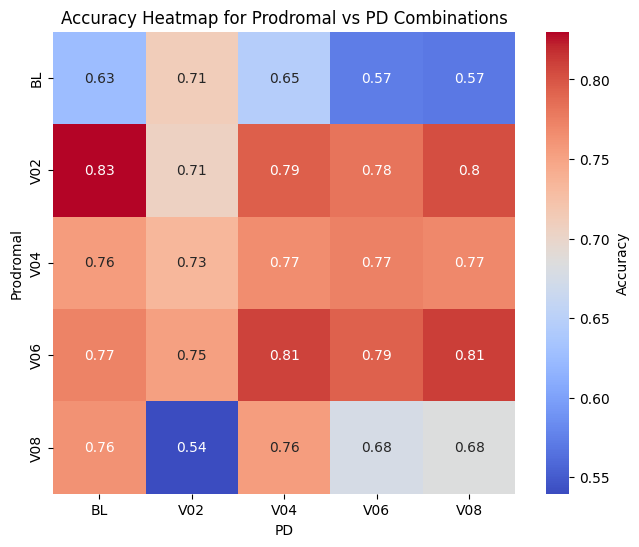

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
PD= []
acc = []
for i,j in ACCURACY_DICT.items():
    pro.append(i.split('_')[1])
    PD.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pro_PD = pd.DataFrame([PD,pro,acc]).T
accuracy_table_pro_PD  = accuracy_table_pro_PD.rename(columns = {0:'PD', 1:'Prodromal', 2: 'Accuracy'})

accuracy_table_pro_PD['Accuracy'] = accuracy_table_pro_PD['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pro_PD.pivot(index="Prodromal", columns="PD", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for Prodromal vs PD Combinations")

plt.savefig("../heatmaps_plots/accuracy_heatmaps/PD_prodromal_vs_pd_acc_heatmap.svg", format='svg')

plt.show()

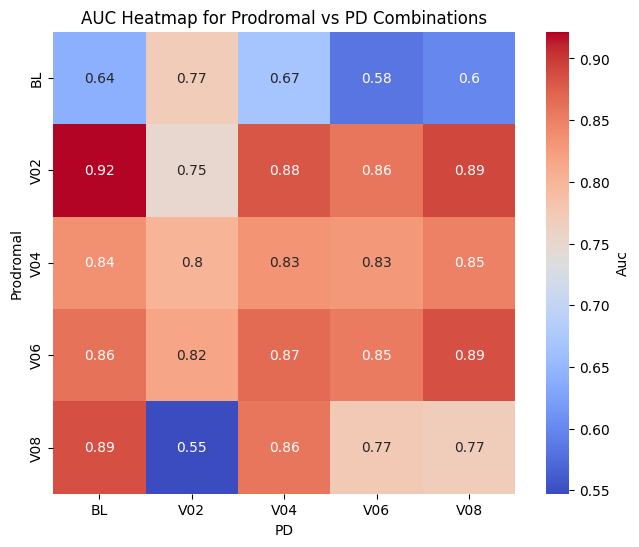

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
PD= []
auc = []
for i,j in AUC_SCORES.items():
    pro.append(i.split('_')[1])
    PD.append(i.split('_')[-1])
    auc.append(j)


auc_table_pro_PD = pd.DataFrame([PD,pro,auc]).T
auc_table_pro_PD  = auc_table_pro_PD.rename(columns = {0:'PD', 1:'Prodromal', 2: 'Auc'})

auc_table_pro_PD['Auc'] = auc_table_pro_PD['Auc'].astype(float)
heatmap_data_ = auc_table_pro_PD.pivot(index="Prodromal", columns="PD", values="Auc")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Auc'})
plt.title("AUC Heatmap for Prodromal vs PD Combinations")
plt.savefig("../heatmaps_plots/auc_heatmaps/PD_prodromal_vs_pd_auc_heatmap.svg", format='svg')

plt.show()

In [61]:
df_acc = pd.DataFrame(list(ACCURACY_DICT.items()), columns=['Comparison', 'Accuracy'])
df_auc = pd.DataFrame(list(AUC_SCORES.items()), columns=['Comparison', 'AUC'])
#df_f1  = pd.DataFrame(list(F1_SCORES.items()), columns=['Comparison', 'F1'])
df_precision = pd.DataFrame(list(PRECISION_SCORES.items()), columns=['Comparison', 'Precision'])
df_recall = pd.DataFrame(list(RECALL_SCORES.items()), columns=['Comparison', 'Recall'])

import pandas as pd
from functools import reduce

# List of DataFrames to merge
dfs = [df_acc, df_auc, df_precision, df_recall]

# Merge all DataFrames on 'Comparison'
df_all = reduce(lambda left, right: pd.merge(left, right, on='Comparison'), dfs)

df_all.to_csv('../metrics_csv_files/metrics_PD_prodromal_vs_pd.csv',index = False)

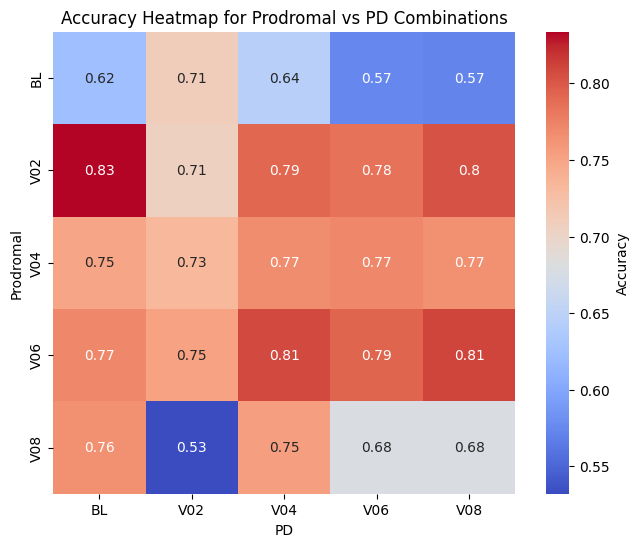

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
PD= []
acc = []
for i,j in ACCURACY_DICT.items():
    pro.append(i.split('_')[1])
    PD.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pro_PD = pd.DataFrame([PD,pro,acc]).T
accuracy_table_pro_PD  = accuracy_table_pro_PD.rename(columns = {0:'PD', 1:'Prodromal', 2: 'Accuracy'})

accuracy_table_pro_PD['Accuracy'] = accuracy_table_pro_PD['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pro_PD.pivot(index="Prodromal", columns="PD", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for Prodromal vs PD Combinations")
plt.show()

In [ ]:
accuracy_table_pro_PD

In [ ]:
heatmap_data_

In [ ]:
heatmap_data_.T

In [ ]:
FEATURE_IMPORTANCES['Prodromal_V08_PD_BL_0']

In [ ]:
FEATURE_IMPORTANCES['Prodromal_V08_PD_BL_0']
sorted_1_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_PD_BL_0'].items(), key=lambda item: item[1]))
sorted_1_dict_FEATURE_IMPORTANCES_asc 

In [ ]:
FEATURE_IMPORTANCES['Prodromal_V08_PD_V08_0']
sorted_0_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_PD_V08_0'].items(), key=lambda item: item[1]))

In [ ]:

FEATURE_IMPORTANCES['Prodromal_V08_PD_V08_0']
sorted_0_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_PD_V08_0'].items(), key=lambda item: item[1]))


In [ ]:
sorted_0_dict_FEATURE_IMPORTANCES_asc

In [ ]:
sorted_1_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_PD_V08_0'].items(), key=lambda item: item[1]))
sorted_1_dict_FEATURE_IMPORTANCES_asc

In [ ]:
sorted_2_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_PD_V08_0'].items(), key=lambda item: item[1]))
sorted_2_dict_FEATURE_IMPORTANCES_asc

In [ ]:
data.DIAGNOSIS.value_counts()

In [ ]:
data['DIAGNOSIS_2'] = data['DIAGNOSIS']

In [ ]:
data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)


In [ ]:
data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']

In [ ]:
data = data.sort_values(by = 'New_Time_Point')

In [ ]:
tmp_data = data[data.Time_Point !='V02']

In [ ]:
tmp_data

In [ ]:
df = pd.DataFrame(sorted_2_dict_FEATURE_IMPORTANCES_asc.items())
df[2] = np.abs(df[1])
df = df.sort_values(by = 2, ascending=False)
df

In [ ]:
genes = df[0].values.tolist()

In [ ]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return ensembleid

In [ ]:
len(genes)

In [ ]:
len(genes[50:95])

In [ ]:
import matplotlib.pyplot as plt

# Loop through each gene
for gene in genes:
    # Create a new figure for each gene
    plt.figure(figsize=(12, 8))
    
    # Define a list to store the group data
    groups = ['Control', 'Prodromal', 'PD']
    colors = {'Control': 'blue', 'Prodromal': 'orange', 'PD': 'green'}
    
    for group in groups:
        # Filter and sort data by group
        group_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith(group)]
        group_tmp_data = group_tmp_data.sort_values(by='New_Time_Point')
        
        # Calculate mean and standard deviation
        mean_expression = group_tmp_data.groupby('New_Time_Point')[gene].mean()
        std_expression = group_tmp_data.groupby('New_Time_Point')[gene].std()
        
        # Extract clean time points
        index = [i.split('_')[1] for i in mean_expression.index]
        
        # Plot mean expression
        plt.plot(index, mean_expression, color=colors[group], label=f'{group} Mean Expression')
        
        # Fill the standard deviation area
        plt.fill_between(index,
                         mean_expression - std_expression,
                         mean_expression + std_expression,
                         color=colors[group], alpha=0.2, label=f'{group} ± STD')
    
    # Customize plot
    plt.xlabel('Time')
    plt.ylabel('Gene Expression')
    gene  = return_gene_name(gene)
    plt.title(f'Mean Expression of {gene} Over Time Across Groups')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:
FEATURE_IMPORTANCES.keys()

In [ ]:
compare_list = [ 'Prodromal_BL_PD_BL',  'Prodromal_V02_PD_V02' ,'Prodromal_V04_PD_V04','Prodromal_V06_PD_V06', 'Prodromal_V08_PD_V08']

In [ ]:
compare_list

In [ ]:
FEATURE_IMPORTANCES_Prodromal_BL_PD_BL = dict()
FEATURE_IMPORTANCES_Prodromal_V02_PD_V02 = dict()
FEATURE_IMPORTANCES_Prodromal_V04_PD_V04 = dict()
FEATURE_IMPORTANCES_Prodromal_V06_PD_V06 = dict()
FEATURE_IMPORTANCES_Prodromal_V08_PD_V08 = dict()

for i in FEATURE_IMPORTANCES.keys():
    if 'Prodromal_BL_PD_BL' in i:
        FEATURE_IMPORTANCES_Prodromal_BL_PD_BL[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V02_PD_V02' in i:
        FEATURE_IMPORTANCES_Prodromal_V02_PD_V02[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V04_PD_V04' in i:
        FEATURE_IMPORTANCES_Prodromal_V04_PD_V04[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V06_PD_V06' in i:
        FEATURE_IMPORTANCES_Prodromal_V06_PD_V06[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V08_PD_V08' in i:
        FEATURE_IMPORTANCES_Prodromal_V08_PD_V08[i] = FEATURE_IMPORTANCES[i]
        
        

In [ ]:
list(FEATURE_IMPORTANCES_Prodromal_BL_PD_BL.keys())[:10]

In [ ]:
genes_list = list(FEATURE_IMPORTANCES_Prodromal_BL_PD_BL['Prodromal_BL_PD_BL_0'].keys())
genes_list[0:10]

In [ ]:
len(FEATURE_IMPORTANCES_Prodromal_BL_PD_BL.keys())

In [ ]:
AVG_FEATURE_IMPORTANCES_Prodromal_BL_PD_BL = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_BL_PD_BL.keys():
        s += FEATURE_IMPORTANCES_Prodromal_BL_PD_BL[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_BL_PD_BL.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_BL_PD_BL[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V02_PD_V02 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V02_PD_V02.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V02_PD_V02[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V02_PD_V02.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V02_PD_V02[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V04_PD_V04 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V04_PD_V04.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V04_PD_V04[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V04_PD_V04.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V04_PD_V04[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V06_PD_V06 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V06_PD_V06.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V06_PD_V06[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V06_PD_V06.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V06_PD_V06[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V08_PD_V08 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V08_PD_V08.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V08_PD_V08[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V08_PD_V08.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V08_PD_V08[i] = s
      

In [ ]:
AVG_FEATURE_IMPORTANCES_Prodromal_BL_PD_BL

In [ ]:
FEATURE_IMPORTANCES_MERGE = dict()

In [ ]:
FEATURE_IMPORTANCES_MERGE['Prodromal_BL_PD_BL'] = AVG_FEATURE_IMPORTANCES_Prodromal_BL_PD_BL
FEATURE_IMPORTANCES_MERGE['Prodromal_V02_PD_V02'] = AVG_FEATURE_IMPORTANCES_Prodromal_V02_PD_V02
FEATURE_IMPORTANCES_MERGE['Prodromal_V04_PD_V04'] = AVG_FEATURE_IMPORTANCES_Prodromal_V04_PD_V04
FEATURE_IMPORTANCES_MERGE['Prodromal_V06_PD_V06'] = AVG_FEATURE_IMPORTANCES_Prodromal_V06_PD_V06
FEATURE_IMPORTANCES_MERGE['Prodromal_V08_PD_V08'] = AVG_FEATURE_IMPORTANCES_Prodromal_V08_PD_V08


In [ ]:
ranking_of_features = []
for i in compare_list:


    df = pd.DataFrame(FEATURE_IMPORTANCES_MERGE[i].items())
    df[2] = np.abs(df[1])
    df = df.sort_values(by = 2, ascending=False)
    print(df)
    ranking_of_features.append(df[0].tolist())


In [ ]:
ranking_of_features[4][0:10]

In [ ]:
gene_lists = ranking_of_features

In [ ]:
gene_lists

In [ ]:
gene_indices = {}

# Loop through each list and index each gene
for list_idx, gene_list in enumerate(gene_lists):
    for gene_idx, gene in enumerate(gene_list):
        # Initialize the gene's entry if not present
        if gene not in gene_indices:
            gene_indices[gene] = [-1] * len(gene_lists)  # Default -1 for lists where gene is absent
        # Update the index of the gene in the current list
        gene_indices[gene][list_idx] = gene_idx

# Display results
for gene, indices in gene_indices.items():
    print(f"{gene}: {indices}")

In [ ]:
ranking_df = pd.DataFrame(gene_indices).T
ranking_df.columns = ['BL','V02','V04','V06','V08']
ranking_df

In [ ]:
ranking_df.shape

In [ ]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return np.nan

In [ ]:
tmp_df = ranking_df.reset_index()
ranking_df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()

In [ ]:
ranking_df

In [ ]:
ranking_df.loc['ENSG00000177628','Gene_Name'] = 'GBA1'
ranking_df.set_index('Gene_Name',inplace=True)
ranking_df

In [ ]:
ranking_df.to_csv('ranking_df/standard_pd_genes_prodromal_to_PD_ranking_df.csv', index=True)

In [ ]:
subset_dict = {key: gene_indices[key] for key in ranking_of_features[4] if key in gene_indices}

print(subset_dict)

In [ ]:
subset_dict

In [ ]:
gene_ranks = subset_dict


In [ ]:
# Original dictionary with gene rankings
'''gene_ranks = subset_dict


# Flatten the list to find the min and max values across all rankings
all_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]
min_rank, max_rank = min(all_ranks), max(all_ranks)

# Normalize each ranking
normalized_gene_ranks = {
    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]
    for gene, ranks in gene_ranks.items()
}

# Display the normalized rankings
for gene, normalized_ranks in normalized_gene_ranks.items():
    print(f"{gene}: {normalized_ranks}")'''


In [ ]:
df = pd.DataFrame(gene_ranks).T
df

In [ ]:
df

In [ ]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return np.nan

tmp_df = df.reset_index()
df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()


In [ ]:
df[df.Gene_Name.isna()]

In [ ]:
df.loc['ENSG00000177628','Gene_Name'] = 'GBA1'
df.set_index('Gene_Name',inplace=True)

In [ ]:
ranked_df = df.rank(axis=0, method='min').astype(int)

print(ranked_df)

In [ ]:
reversed_ranks = ranked_df .max() - ranked_df  + 1

print(reversed_ranks)

In [ ]:
rank_dict = reversed_ranks.T.to_dict(orient='list')
rank_dict

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# The rank positions for each gene across four layers
gene_ranks = rank_dict

G = nx.DiGraph()

# Number of layers
num_layers = len(next(iter(gene_ranks.values())))

# Add nodes and edges for each gene across the layers
for gene, ranks in gene_ranks.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

plt.title("Gene Rank Progression Across Layers")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

# Set the position of the StartNode to be at the mid-left of the first layer
start_node_x_pos = -5 # Fixed position on the left
start_node_y_pos = -1.5  # Middle of first layer vertically

# Position the nodes
for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    
    if layer == -1:
        # Place the StartNode on the mid-left of the first layer
        pos[node] = (start_node_x_pos, start_node_y_pos)
    else:
        # Place other nodes based on their layer and rank
        pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(30, 30))
nx.draw(G, pos, with_labels=True, node_size=150, font_size=16, arrowstyle='->', arrowsize=40, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode", fontsize=26)
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower

# Save the plot as an SVG file
plt.savefig("gene_rank_progression_with_start_node_left.svg", format="svg")
plt.savefig("gene_rank_progression_with_start_node_left.png", format="png")
plt.savefig("smaller_plots/smaller_gene_ranked_prgression_prodromal_to_pd.png", dpi=100)

# Show the plot
plt.show()


In [122]:
results

,Gene name,Gene stable ID
3045,SYNJ1,ENSG00000159082
6572,LRP10,ENSG00000197324
23468,PLA2G6,ENSG00000184381
24967,DNAJC6,ENSG00000116675
27540,FBXO7,ENSG00000100225
27674,TMEM230,ENSG00000089063
28381,EIF4G1,ENSG00000114867
35592,PINK1,ENSG00000158828
39101,SNCA,ENSG00000145335
39185,GIGYF2,ENSG00000204120


In [ ]:
keep_genes

In [ ]:
gene_list = df2['PD genes'].tolist()
set(gene_list) - set(results['Gene name'].tolist())

In [123]:
!mkdir -p feature_importance_weights/PD_genes//prodromal_vs_pd
def return_value(i):

    l = [AVG_FEATURE_IMPORTANCES_Prodromal_BL_PD_BL[i],AVG_FEATURE_IMPORTANCES_Prodromal_V02_PD_V02[i],AVG_FEATURE_IMPORTANCES_Prodromal_V04_PD_V04[i],
    AVG_FEATURE_IMPORTANCES_Prodromal_V06_PD_V06[i],AVG_FEATURE_IMPORTANCES_Prodromal_V08_PD_V08[i]]
    return l


li = []
genes = []
for i in AVG_FEATURE_IMPORTANCES_Prodromal_BL_PD_BL.keys():
    
    li.append(return_value(i))
    genes.append(i)

df = pd.DataFrame(li)
df['genes'] = genes
df = df.set_index('genes')
df.columns = ['BL','V02','V04','V06','V08']
df['Gene_Name'] =df.reset_index()['genes'].apply(return_gene_name).tolist()
df = df.set_index('Gene_Name')
df.to_csv(f'feature_importance_weights/PD_genes/prodromal_vs_pd/prodromal_vs_pd.csv',index = True)
df


,BL,V02,V04,V06,V08
Gene_Name,,,,,
PLA2G6,-0.147359,0.235856,0.271585,-0.003688,-0.205714
VPS35,0.131934,0.302806,0.184249,0.017372,0.237245
PRKN,-0.068103,-0.159599,-0.320296,-0.291898,0.030297
RIC3,0.003906,0.032892,0.251568,0.338293,0.044909
NaN,-0.310027,-0.461887,-0.021777,-0.307511,-0.214320
LRP10,0.149011,0.158900,-0.138071,-0.018361,0.183984
DNAJC6,-0.058999,-0.216529,-0.030541,-0.290812,-0.203547
GIGYF2,0.002268,-0.038509,-0.078198,0.015402,0.004461
SNCA,0.001778,0.001433,0.004073,0.003237,0.011240
